In [ ]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 36kB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 3.9MB 40.1MB/s 
     |████████████████████████████████| 450kB 42.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=48dc03b7d6f9a444fc02fbf887065429191b1d80da111ac25b3d2ec6957c8038
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tens

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from numpy import argmax

In [ ]:
x=np.zeros((183,96,96,3),dtype=np.float32)
ye=np.zeros((183,1),dtype=np.float32)

In [ ]:
p=0
for filename in os.listdir('/content/drive/MyDrive/players'):
    for player in os.listdir('/content/drive/MyDrive/players'+'/'+filename):
        img=cv2.imread('/content/drive/MyDrive/players'+'/'+filename+'/'+player)
        x[p]=cv2.resize(img,(96,96))
        ye[p]=int(filename)
        p=p+1
y = to_categorical(ye)
print(y)   

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1.

In [ ]:
x=x/255.0

In [ ]:
from sklearn.utils import shuffle

In [ ]:
v, u = shuffle(x, y)

In [ ]:
inputs=keras.layers.Input((96,96,3))
l1=keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu')(inputs)
l2=keras.layers.MaxPool2D((2,2))(l1)


l3=keras.layers.Conv2D(16,(3,3),activation='relu')(l2)
l4=keras.layers.MaxPool2D((2,2))(l3)

l5=keras.layers.Conv2D(8,(3,3),activation='relu')(l4)
l6=keras.layers.MaxPool2D((2,2))(l5)

l7=keras.layers.Conv2D(2,(3,3),activation='relu')(l6)


l8=keras.layers.Flatten()(l7)
l9=keras.layers.Dense(256,activation='relu')(l8)
l10=keras.layers.Dropout(0.5)(l9)
l11=keras.layers.Dense(3,activation='sigmoid')(l10)
model=keras.Model(inputs=inputs,outputs=l11)

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [ ]:
model.fit(v,u,6,500)

Train on 183 samples
Epoch 1/500
183/183 [==============================] - 2s 11ms/sample - loss: 1.3719e-07 - accuracy: 1.0000
Epoch 2/500
183/183 [==============================] - 2s 11ms/sample - loss: 8.9729e-08 - accuracy: 1.0000
Epoch 3/500
183/183 [==============================] - 2s 11ms/sample - loss: 0.0035 - accuracy: 0.9982
Epoch 4/500
183/183 [==============================] - 2s 11ms/sample - loss: 1.6248e-06 - accuracy: 1.0000
Epoch 5/500
183/183 [==============================] - 2s 10ms/sample - loss: 2.5960e-08 - accuracy: 1.0000
Epoch 6/500
183/183 [==============================] - 2s 11ms/sample - loss: 1.6441e-08 - accuracy: 1.0000
Epoch 7/500
183/183 [==============================] - 2s 11ms/sample - loss: 2.1259e-09 - accuracy: 1.0000
Epoch 8/500
183/183 [==============================] - 2s 11ms/sample - loss: 1.1516e-08 - accuracy: 1.0000
Epoch 9/500
183/183 [==============================] - 2s 10ms/sample - loss: 6.3298e-09 - accuracy: 1.0000
Epoch 10/50

1
1


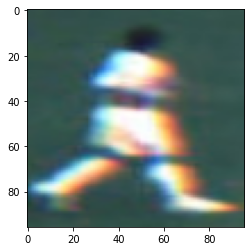

In [ ]:
o=110
yu=model.predict(np.reshape(v[o],(1,96,96,3)))
plt.imshow(v[o])
print(argmax(yu))
print(argmax(u[o]))

In [ ]:
model.save('model2.h5')